<a href="https://colab.research.google.com/github/ShindeAnjali2k6/DataAnalysis/blob/main/Heart_Disease_Predictive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart (1).csv


In [ ]:
print(uploaded.keys())


dict_keys(['heart (1).csv'])


In [ ]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['heart (1).csv']))
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape


(28, 14)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       28 non-null     int64  
 1   sex       28 non-null     int64  
 2   cp        28 non-null     int64  
 3   trestbps  28 non-null     int64  
 4   chol      28 non-null     int64  
 5   fbs       28 non-null     int64  
 6   restecg   28 non-null     int64  
 7   thalach   28 non-null     int64  
 8   exang     28 non-null     int64  
 9   oldpeak   28 non-null     float64
 10  slope     28 non-null     int64  
 11  ca        28 non-null     int64  
 12  thal      28 non-null     int64  
 13  target    28 non-null     int64  
dtypes: float64(1), int64(13)
memory usage: 3.2 KB


In [ ]:
df.describe()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,52.714286,0.678571,1.464286,135.071429,242.392857,0.107143,0.821429,161.642857,0.142857,1.021429,1.571429,0.214286,2.464286,0.464286
std,8.427719,0.475595,1.035737,13.735406,41.613156,0.314970,0.390021,15.823598,0.356348,0.852168,0.690066,0.629941,0.637248,0.507875
min,37.000000,0.000000,0.000000,110.000000,168.000000,0.000000,0.000000,114.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,45.500000,0.000000,1.000000,120.000000,224.250000,0.000000,1.000000,152.500000,0.000000,0.475000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.500000,137.500000,237.500000,0.000000,1.000000,162.500000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,58.000000,1.000000,2.000000,141.250000,257.750000,0.000000,1.000000,172.250000,0.000000,1.525000,2.000000,0.000000,3.000000,1.000000
max,69.000000,1.000000,3.000000,172.000000,354.000000,1.000000,1.000000,187.000000,1.000000,3.500000,2.000000,2.000000,3.000000,1.000000


In [ ]:
df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df['target'].value_counts()


,count
target,
0,15
1,13


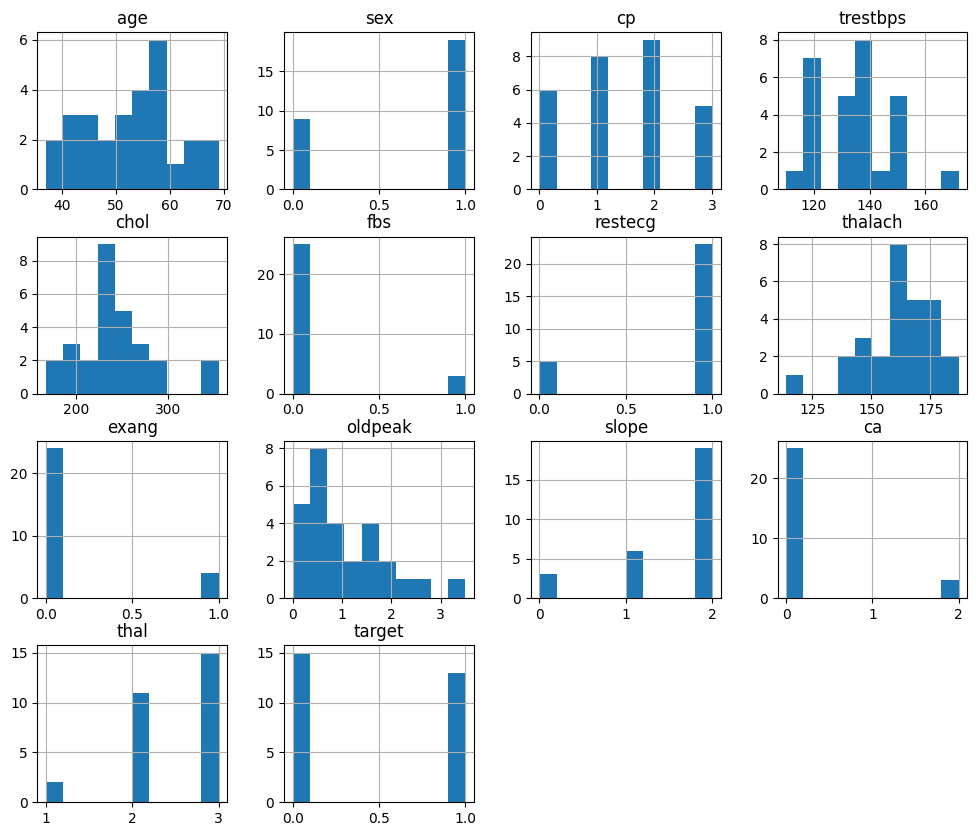

In [ ]:
import matplotlib.pyplot as plt
df.hist(figsize=(12,10))
plt.show()


<Axes: xlabel='target', ylabel='count'>

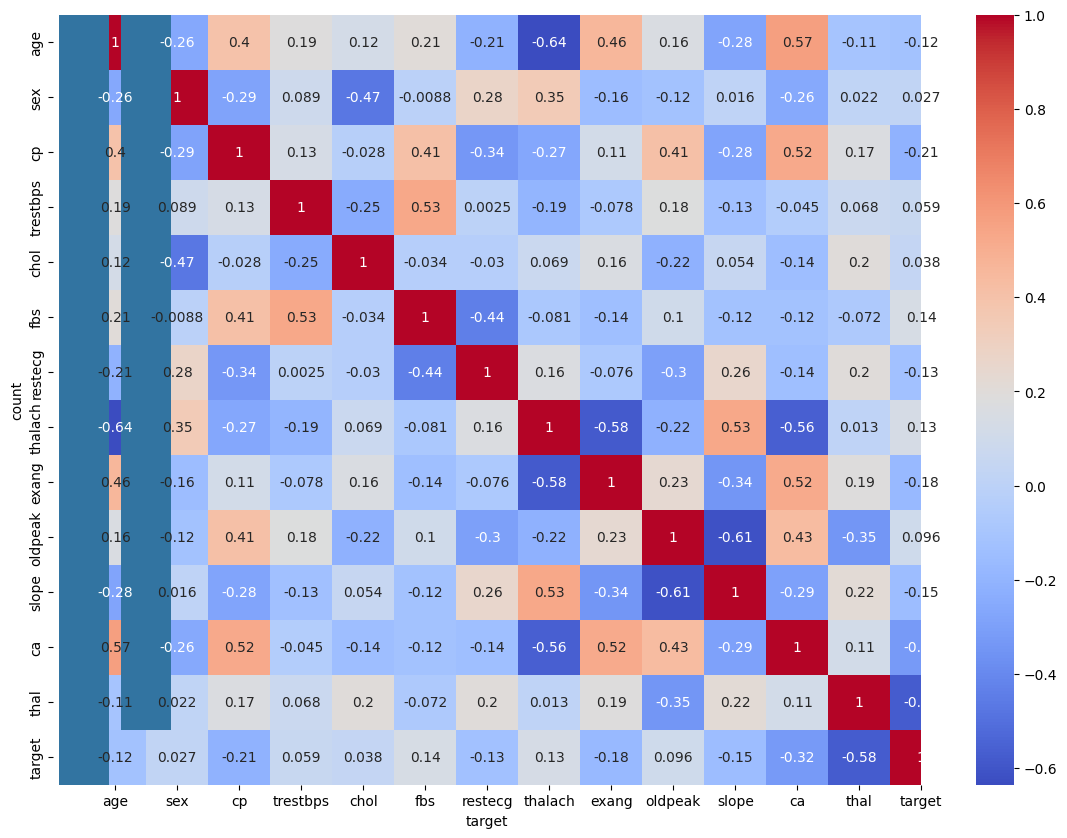

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

# Countplot for target
sns.countplot(data=df, x='target')


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5
[[2 0]
 [3 1]]
              precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       1.00      0.25      0.40         4

    accuracy                           0.50         6
   macro avg       0.70      0.62      0.49         6
weighted avg       0.80      0.50      0.46         6



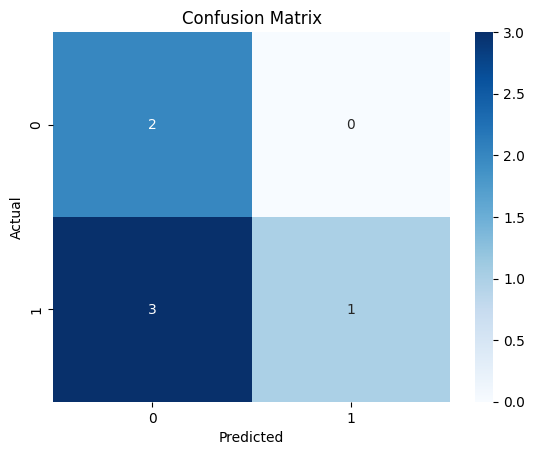

In [ ]:
# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


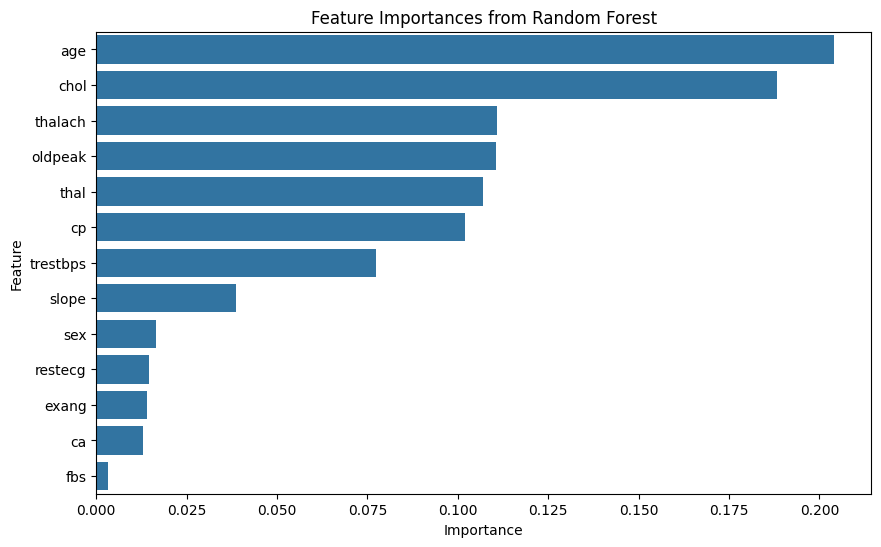

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming model is already trained (RandomForestClassifier)
feature_importances = model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importances from Random Forest')
plt.show()


In [ ]:
top_features = feat_imp_df['Feature'][:8].values
print("Selected Features:", top_features)

X_selected = df[top_features]
y = df['target']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model again
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy with selected features:", accuracy_score(y_test, y_pred))


Selected Features: ['age' 'chol' 'thalach' 'oldpeak' 'thal' 'cp' 'trestbps' 'slope']
Accuracy with selected features: 0.5


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split dataset with selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model on selected features
model_selected = RandomForestClassifier(random_state=42)
model_selected.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model_selected.predict(X_test_scaled)

print("Accuracy with selected features:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy with selected features: 0.5
[[2 0]
 [3 1]]
              precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       1.00      0.25      0.40         4

    accuracy                           0.50         6
   macro avg       0.70      0.62      0.49         6
weighted avg       0.80      0.50      0.46         6

